In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True) #sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

# Astero seismology and spherical harmonics

## Introduction


## References

* [Excellent AAVSO introduction from Conny Aerts on Astera seismology](https://www.youtube.com/watch?v=b7KcFvASM0Y&ab_channel=AAVSOHQ)
* [Wikipedia article about asteroseismology](https://en.wikipedia.org/wiki/Asteroseismology)
* [Wikipedia article about spherical harmonics](https://en.wikipedia.org/wiki/Spherical_harmonics)
* [Wikipedia article about bessel functions](https://en.wikipedia.org/wiki/Bessel_function)
* [scipy manual for spherical harmonics](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html)
* [scipython blog for spherical harmonics vizualization](https://scipython.com/blog/visualizing-the-real-forms-of-the-spherical-harmonics/)
* [ChatGPT](chat.openai.com)

## Basics of differential equations for star modelisation

### Introduction
From [wikipedia article](https://en.wikipedia.org/wiki/Asteroseismology):

By linearly perturbing the equations defining the mechanical equilibrium of a star (i.e. mass conservation and hydrostatic equilibrium) and assuming that the perturbations are adiabatic, one can derive a system of four differential equations whose solutions give the frequency and structure of a star's modes of oscillation. The stellar structure is usually assumed to be spherically symmetric, so the horizontal (i.e. non-radial) component of the oscillations is described by spherical harmonics, indexed by an angular degree $\ell$  and azimuthal order $m$.

## Spherical harmonics

### Fourier series and the laplacian operator

Fourier series properties can be analyzed within various mathenatical framework. One of them is related to the Laplacian operator:

We recall that the Laplacian operator, sometimes written $\nabla \cdot \nabla$, $\nabla^2$ or $\Delta$, where $\nabla$ can be written $\left( \frac{\partial}{\partial x_0}, \frac{\partial}{\partial x_1}, \dots \frac{\partial}{\partial x_{n-1}} \right)$ and the laplacian operator applied to a function $f$ reads $\Delta f = \sum_{i=0}^{n-1} \frac{\partial f}{\partial x_i^2}$.

Laplacian operator is the core operator of many different PDEs, and in particular to solve the heat equation, for which Joseph Fourier was famous for:

\begin{align}
\frac{\partial f}{\partial t} = \Delta_{xy} f
\end{align}


It is interesting to notice that the trigonometric polynomial that defines the (separable) Fourier series basis elements are eigenfunctions for the laplacian operators over euclidean spaces:

lets define $\delta_{nF}(x) = e^{2 \pi j nFx}$

And
\begin{align}
  \frac{\partial \delta_{nF}}{\partial x} (x) &= \frac{\partial  e^{2 \pi j nFx}}{\partial x} \\
  &= 2 \pi j nF e^{2 \pi j nFx} \\
\end{align}

And
\begin{align}
  \frac{\partial \delta_{nF}}{\partial x^2} (x) &=  -(2\pi nF)^2 e^{2 \pi j nFx} \\
  &= -(2\pi nF)^2 \delta_{nF}\\
  &= \lambda \delta_{nF}
\end{align}

Moreover, eigenfunctions of the laplacian can also be defined for functions on finite domains ([Bessel functions](https://en.wikipedia.org/wiki/Bessel_function) for radially symmetric domain like disks/cylinders and sphere), or [spherical harmonics](https://en.wikipedia.org/wiki/Spherical_harmonics) also for spherical domains.

### A basic introduction to Laplace and Poisson partial differential equations
This short paragraph is based on [Poisson equation wikipedia page](https://en.wikipedia.org/wiki/Poisson%27s_equation) and [this youtube video](https://www.youtube.com/watch?v=lsY7zYaezto)

At the core, a Poisson equation, sought after a scalar valued fonction, and the equation gives you an expression for the Laplacian of this function, which is also a scalar field, example

\begin{align*}
  \Delta f = \phi
\end{align*}

#### Laplace equation / Elliptic PDE
\begin{align*}
  \Delta f = 0 \\
  \Delta_{xy} f = 0 \\
\end{align*}

If the scalar field $\phi$ is zero everywhere on your (spatial) domain, then when have a Laplace equation. Solutions to Laplace equation are called harmonic. It is pretty interesting to take a quick look at where the harmonic terms comes from: fourier series are expressed in terms of sum of complex harmonic functions (the $e^{2\pi jnFt}$). It appears that the laplacian (in one dimension) of this family of function is $-(2\pi nF)^2 e^{2\pi jnFt}$ hence, one can say that those are eigenfunctions for the laplacian operator. This will be one of the core reason why Fourier series are useful for Laplace equations.

Thanks to the linearity property of Laplace operator, one can also see that, the set of solutions of laplace equation (without bounday conditions) is equivalent to the nullspace of $\Delta_{xy}$.

#### Poisson equation / Elliptic PDE
\begin{align*}
  \Delta f = \phi \\
  \Delta_{xy} f = \phi \\
\end{align*}

If the scalar field $\phi$ is not zero everywhere on your (spatial) domain, then when have a Poisson equation. Interestingly, thanks to the linearity property of the Laplacian, one can see that (if we abstract boundary conditions) a set of solution for the Poisson equation can be obtained by finding a particular solution to $\Delta f = \phi$ and adding any element from the nullspace of the Laplacian operator. Which is why the two equation are strongly related.

#### Heat equation / parabolic PDE
\begin{align*}
  \Delta f = \phi \\
  \Delta_{xy} f = \frac{\partial f}{\partial t} \\
\end{align*}

In case there's another variable and gradient operator involved in $\phi$, we are given with heat equation, for which a very famous solution was found by Joseph Fourier, we'll talk about that shortly after. Basically, the evolution of your scalar function $f$ defined over some (spatial) domain $x,y$ with respect to some variable $t$, is given by the laplacian of that very same scalar function itself. This allows so simulate the system by small time steps.

#### Wave equation  / hyperbolic PDE
\begin{align*}
  \Delta f = \phi \\
  \Delta f = \frac{\partial^2 f}{\partial t^2} f \\
\end{align*}
Wave equation is a bit like heat equation, but this time, it is the acceleration of the system (the scalar field) that is described by its own laplacian.

#### A bit of math
One can see, that, whatever solution you find for your Laplace equation, it will need to be expressed in terms of the given solution, that satisfies your boundary conditions plus the nullspace of the laplacian operator.

### Laplacian operator defined on various domains

Additional details for the theoretical aspects of distribution theory can be found on [this wikipedia article](https://en.wikipedia.org/wiki/Laplacian_of_the_indicator)

We often describe a domain, or a set $D$ through its indicator function, often denoted $\mathbf{1}_{D}\colon X\to \{0,1\}$ which is defined as:
\begin{align*}
  \mathbf{1}_{D}(x):=
  \begin{cases}
    1~&{\text{ if }}~x\in D~,\\
    0~&{\text{ if }}~x\notin D~.
  \end{cases}
\end{align*}

It is interesting to notice, that indicator can actually be seen as a generalization of the dirac (denoted $\delta$) function for point, but adapted to surfaces, ie:

\begin{align*}
  \delta(x) &\to -n_x\cdot\nabla_x\mathbf{1}_{x\in D} \\
  \delta'(x) &\to \nabla_x^2 \mathbf{1}_{x\in D}.
\end{align*}

Where n is the outward normal vector.

Now, every PDE that has to be solved over a domain, has a solution than can be seen as a product of a solution valid over the domain with the indicator function of this domain.


### Spherical harmonics in practice

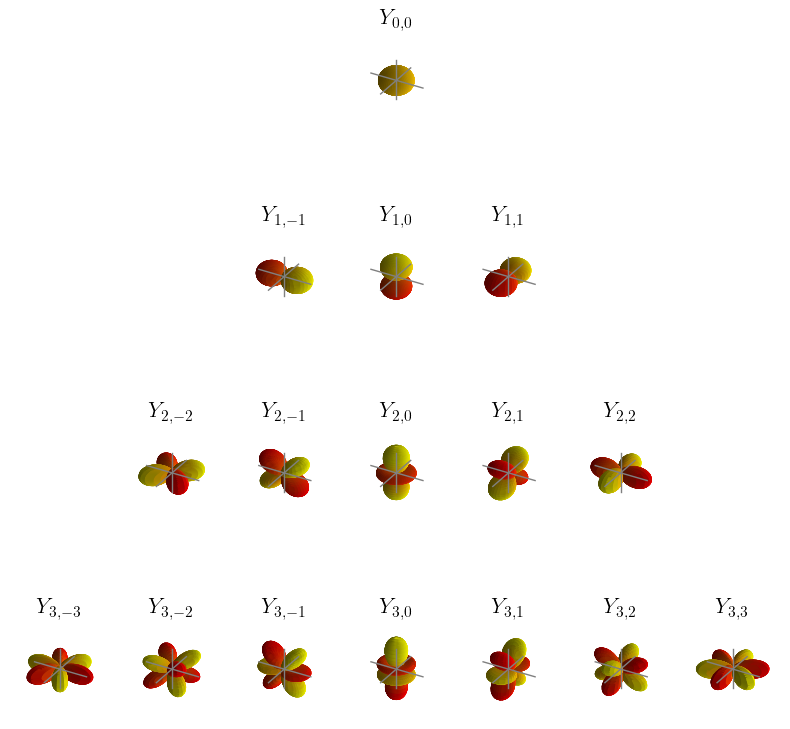

In [8]:
# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('autumn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

# fig = plt.figure(figsize=plt.figaspect(1.))
# ax = fig.add_subplot(projection='3d')
# l, m = 3, 0
# plot_Y(ax, l, m)
# #plt.savefig('Y{}_{}.png'.format(l, m))
# plt.show()

el_max = 3
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        #print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
#plt.savefig('sph_harm.png')
#plt.show()